<a href="https://colab.research.google.com/github/sajedehfarahbod/training-deep-learning-with-PyTorch/blob/main/S02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.2.0

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.1 MB/s eta 0:00:00


In [ ]:
import sklearn
sklearn.__version__

'1.2.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [ ]:
df = pd.read_csv("housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27c6eeb4f0>,
      dtype=object)

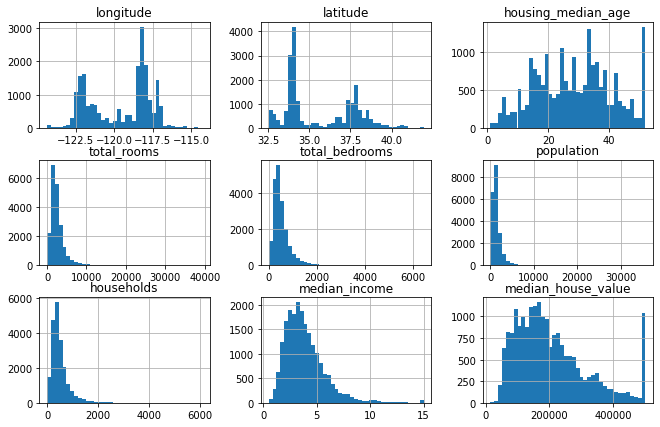

In [ ]:
df.hist(bins=40, figsize=(11,7))

# Train and Test set

In [ ]:
def shuffle_and_split_df(df, test_ratio):
  np.random.seed(40)
  random_indices = np.random.permutation(len(df))
  test_set_size = int(len(df) * test_ratio)
  test_random_indices = random_indices[:test_set_size]
  train_random_indices = random_indices[test_set_size:]
  return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [ ]:
train_set, test_set = shuffle_and_split_df(df, 0.2)

In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN


In [ ]:
from zlib import crc32

In [ ]:
crc32(np.int64(10))

4108501921

In [ ]:
def is_identifier_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio*2**32

In [ ]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_column):
  identifiers = df[identifier_column]
  in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
  return df.loc[~in_test_set], df.loc[in_test_set]

In [ ]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

In [ ]:
df_with_identifier = df
df_with_identifier["identifier"] = df["longitude"]*1000 + df["latitude"]
df_with_identifier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [ ]:
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifier,
                                                            0.2,
                                                            "identifier")

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...
20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND,-120003.07
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND,-121001.00
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN,-118205.94
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN,-117886.36
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN,-118315.87
...,...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN,-118056.23
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY,-122442.25
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN,-117197.14
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN,-117097.04


In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN,-118105.82
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN,-121932.46
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN,-123800.17
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN,-121783.14
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN,-118295.95
...,...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN,-122831.57
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN,-117216.80
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN,-118395.77
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN,-118325.77


In [ ]:
df["median_income_categories"] = pd.cut(df["median_income"],
                                        bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                        labels=[1, 2, 3, 4, 5])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57,2


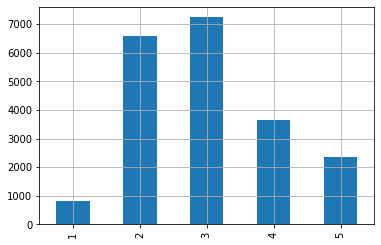

In [ ]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split = []
for train_i, test_i in sss.split(df, df["median_income_categories"]):
  stratified_train_set_n = df.iloc[train_i]
  stratified_test_set_n = df.iloc[test_i]
  stratified_split.append([stratified_train_set_n, stratified_test_set_n])

In [ ]:
stratified_train_set, stratified_test_set = stratified_split[0]

In [ ]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,3


In [ ]:
stratified_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71,3
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96,2
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24,3
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06,2
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75,2
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46,2
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45,3
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10,2


In [ ]:
stratified_test_set["median_income_categories"].value_counts()/len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

In [ ]:
stratified_train_set["median_income_categories"].value_counts()/len(stratified_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [ ]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_income_categories"],
                                               random_state=40)

In [ ]:
str_train_set["median_income_categories"].value_counts()/len(str_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [ ]:
str_train_set = str_train_set.drop("median_income_categories", axis=1)
str_test_set = str_test_set.drop("median_income_categories", axis=1)

In [ ]:
str_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98
...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02


# Visualize

In [ ]:
train = str_train_set

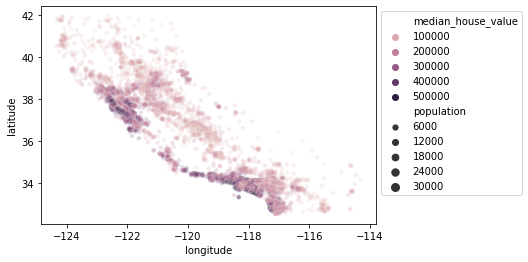

In [ ]:
ax = sns.scatterplot(data=train,
                    x="longitude",
                    y="latitude",
                    size="population",
                    alpha=0.2,
                    hue="median_house_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Correlations

In [ ]:
train.corr()["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
Name: median_house_value, dtype: float64

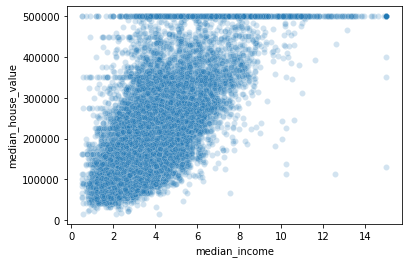

In [ ]:
sns.scatterplot(data=train,
                x="median_income",
                y="median_house_value",
                alpha=0.2)

# Attribute combinations

In [ ]:
train["rooms_per_house"] = train["total_rooms"]/train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"]/train["total_rooms"]
train["people_per_house"] = train["population"]/train["households"]
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,5.722426,0.185031,3.209559


In [ ]:
train.corr()["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
rooms_per_house       0.159500
bedrooms_ratio       -0.255178
people_per_house     -0.027110
Name: median_house_value, dtype: float64

# Prepare Data

In [ ]:
train_features = train.drop("median_house_value", axis=1)
train_target = train["median_house_value"]
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

## Data cleaning

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
# remove rows with NA values
train_features.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16344 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
 9   identifier          16344 non-null  float64
 10  rooms_per_house     16344 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16344 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [ ]:
# train_features_with_imputed_na_values
total_bedrooms_median = train_features["total_bedrooms"].median()
train_features["total_bedrooms"] = train_features["total_bedrooms"].fillna(total_bedrooms_median)

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
train_features["bedrooms_ratio"] = train_features["total_bedrooms"]/train_features["total_rooms"]

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
# sklearn impute

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
simple_imputer = SimpleImputer(strategy="median")

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [ ]:
train_features_numeric = train_features.select_dtypes(include=[np.number])
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   identifier          16512 non-null  float64
 9   rooms_per_house     16512 non-null  float64
 10  bedrooms_ratio      16512 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [ ]:
simple_imputer.fit(train_features_numeric)

SimpleImputer(strategy='median')

In [ ]:
simple_imputer.statistics_

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53410000e+00,
       -1.18445990e+05,  5.22483203e+00,  2.03413719e-01,  2.82065903e+00])

In [ ]:
simple_imputer.transform(train_features_numeric).shape

(16512, 12)

In [ ]:
train_features_numeric = pd.DataFrame(simple_imputer.transform(train_features_numeric),
                                      columns = train_features_numeric.columns,
                                      index = train_features_numeric.index)

In [ ]:
train_features_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,-121292.02,5.722426,0.185031,3.209559


In [ ]:
# Consistency
## estimator
## transformer
## predictors

# Inspection

# Composition

In [ ]:
# categorical features
train_features[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          7324
INLAND             5213
NEAR OCEAN         2126
NEAR BAY           1844
ISLAND                5
dtype: int64

In [ ]:
train_features_categorical = train_features[["ocean_proximity"]]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()
ocean_proximity_index = oe.fit_transform(train_features_categorical)
ocean_proximity_index

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [ ]:
train_features_categorical

,ocean_proximity
16415,INLAND
1279,INLAND
7741,<1H OCEAN
4425,<1H OCEAN
1283,INLAND
...,...
1221,INLAND
12640,INLAND
5747,<1H OCEAN
16224,INLAND


In [ ]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(train_features_categorical)

In [ ]:
ocean_proximity_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
train_features_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray(),
                                              columns=ohe.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
mms.fit_transform(train_features_numeric)

array([[-0.38446215,  0.13496281,  0.60784314, ..., -0.93691343,
        -0.88348775, -0.99668387],
       [-0.46015936,  0.12858661, -0.17647059, ..., -0.91797651,
        -0.87804467, -0.99625062],
       [ 0.23505976, -0.70031881,  0.33333333, ..., -0.94475454,
        -0.84412062, -0.99694115],
       ...,
       [ 0.21115538, -0.65356004,  0.84313725, ..., -0.92477472,
        -0.89817158, -0.99617813],
       [-0.39840637,  0.15621679,  0.37254902, ..., -0.92594157,
        -0.89420346, -0.99594855],
       [ 0.18525896, -0.68969182,  0.41176471, ..., -0.9228987 ,
        -0.90626013, -0.9964474 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(train_features_numeric)

array([[-8.47903024e-01,  1.06069020e+00,  1.06500612e+00, ...,
        -1.79381511e-01, -2.10670105e-01, -2.84533255e-02],
       [-1.03770326e+00,  1.04660645e+00, -5.26863260e-01, ...,
         3.65121948e-01, -9.60951107e-02, -3.75641043e-03],
       [ 7.05462097e-01, -7.84281723e-01,  5.07851836e-01, ...,
        -4.04841051e-01,  6.17994355e-01, -4.31193773e-02],
       ...,
       [ 6.45525179e-01, -6.81000852e-01,  1.54256693e+00, ...,
         1.69649412e-01, -5.19759731e-01,  3.75800155e-04],
       [-8.82866226e-01,  1.10763605e+00,  5.87445305e-01, ...,
         1.36098158e-01, -4.36232057e-01,  1.34628996e-02],
       [ 5.80593518e-01, -7.60808797e-01,  6.67038774e-01, ...,
         2.23591409e-01, -6.90020966e-01, -1.49734229e-02]])

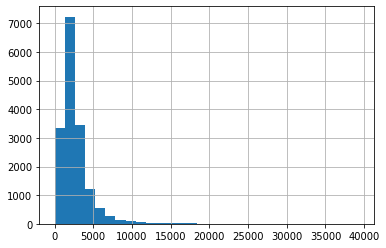

In [ ]:
train_features_numeric["total_rooms"].hist(bins=30)

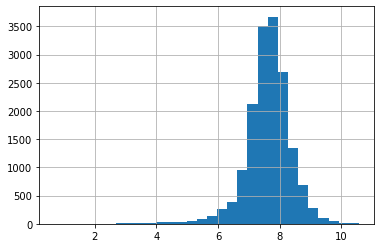

In [ ]:
train_features_numeric["total_rooms"].apply(np.log).hist(bins=30)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
rbf_kernel(train_features_numeric[["housing_median_age"]], [[35]], gamma=0.1)

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

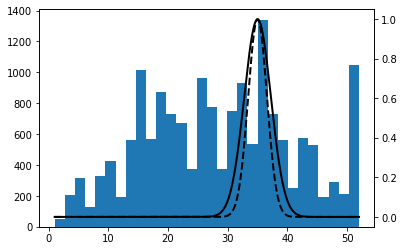

In [ ]:
fig, ax = plt.subplots()
ax.hist(train_features_numeric["housing_median_age"], bins=30)

hosing_ages = np.linspace(train_features_numeric["housing_median_age"].min(),
                          train_features_numeric["housing_median_age"].max(),
                          1000).reshape(-1, 1)

rbf1 = rbf_kernel(hosing_ages, [[35]], gamma=0.1)
rbf2 = rbf_kernel(hosing_ages, [[35]], gamma=0.2)

ax2 = ax.twinx()
ax2.plot(hosing_ages, rbf1, color="black", lw=2)
ax2.plot(hosing_ages, rbf2, color="black", lw=2, ls="--")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ss = StandardScaler()
target_values = ss.fit_transform(train_target.to_frame())
target_values

array([[-0.41979429],
       [ 0.41090161],
       [ 0.02075259],
       ...,
       [ 1.28678181],
       [-1.0601948 ],
       [ 1.12429213]])

In [ ]:
model = LinearRegression()
model.fit(train_features_numeric[["median_income"]],
          target_values)

LinearRegression()

In [ ]:
predictions = model.predict(train_features_numeric[["median_income"]].iloc[:5])

In [ ]:
ss.inverse_transform(predictions)

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

In [ ]:
model.fit(train_features_numeric[["median_income"]],
          train_target.to_frame())

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [ ]:
model.predict(train_features_numeric[["median_income"]].iloc[:5])

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
logarithmic_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
logarithmic_transformer.transform(train_features_numeric[["population"]])

,population
16415,5.545177
1279,6.874198
7741,7.372746
4425,5.517453
1283,4.615121
...,...
1221,7.201171
12640,6.784457
5747,6.715383
16224,7.465083


In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args={"Y":[[35.0]],
                                               "gamma":0.1})

In [ ]:
rbf_transformer.transform(train_features_numeric[["housing_median_age"]])

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

In [ ]:
# duck typing

In [ ]:
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class CustomStandardScaler(BaseEstimator, TransformerMixin):

  def __init__(self, hp=0):
    self.hp = hp

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_of_X = X.mean(axis=0)
    self.std_of_X = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    assert self.n_features_in_ == X.shape[1]
    X = X - self.mean_of_X
    return X / self.std_of_X

In [ ]:
css = CustomStandardScaler()
css.fit_transform(train_features_numeric)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-0.847903,1.060690,1.065006,-1.003811,-1.068653,-1.039117,-1.076980,-0.369087,-0.847609,-0.179382,-0.210670,-0.028453
1279,-1.037703,1.046606,-0.526863,-0.292922,-0.292301,-0.406831,-0.475183,0.309799,-1.037612,0.365122,-0.096095,-0.003756
7741,0.705462,-0.784282,0.507852,0.056499,0.399665,0.148977,0.304237,-0.571951,0.705322,-0.404841,0.617994,-0.043119
4425,0.660509,-0.727947,-0.128896,-1.115959,-1.099996,-1.045343,-1.106142,-1.191467,0.660385,-1.175258,2.181309,-0.002407
1283,-1.127609,1.126414,1.383380,-1.137740,-1.189204,-1.176958,-1.217487,-0.862948,-1.127521,-0.441398,0.457122,-0.049343
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-0.543224,1.248474,-0.606457,0.214989,0.349033,-0.074235,0.123963,-0.914614,-0.542430,0.112548,0.091179,-0.055669
12640,-0.942803,1.365838,0.428258,-0.342044,-0.292301,-0.480642,-0.276351,-0.898940,-0.942278,-0.270037,0.079071,-0.075676
5747,0.645525,-0.681001,1.542567,-0.496364,-0.617790,-0.533110,-0.610388,0.865775,0.645436,0.169649,-0.519760,0.000376
16224,-0.882866,1.107636,0.587445,0.223331,0.095875,0.285928,0.118661,-0.215726,-0.882557,0.136098,-0.436232,0.013463


In [ ]:
# pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy="median")),
    ("minMaxScaler", MinMaxScaler())
])

In [ ]:
make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler()
)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [ ]:
numerical_features_pipeline.fit_transform(train_features_numeric)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.03154328, 0.05825613,
        0.00165807],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.04101175, 0.06097767,
        0.00187469],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.02762273, 0.07793969,
        0.00152942],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.03761264, 0.05091421,
        0.00191094],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.03702921, 0.05289827,
        0.00202573],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.03855065, 0.04686993,
        0.0017763 ]])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
train_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'identifier', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')

In [ ]:
numerical_features = list(train_features.columns)
numerical_features.remove("ocean_proximity")
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'identifier',
 'rooms_per_house',
 'bedrooms_ratio',
 'people_per_house']

In [ ]:
categorical_features = ["ocean_proximity"]

In [ ]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy="median")),
    ("minMaxScaler", MinMaxScaler())
])

In [ ]:
categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [ ]:
total_transformation = ColumnTransformer([
    ("numerical", numerical_features_pipeline, numerical_features),
    ("categorical", categorical_features_pipeline, categorical_features)
])

In [ ]:
"drop"
"passthrough"

'passthrough'

In [ ]:
total_transformation.fit_transform(train_features)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.        , 0.        ,
        0.        ],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
total_transformation.get_feature_names_out()

array(['numerical__longitude', 'numerical__latitude',
       'numerical__housing_median_age', 'numerical__total_rooms',
       'numerical__total_bedrooms', 'numerical__population',
       'numerical__households', 'numerical__median_income',
       'numerical__identifier', 'numerical__rooms_per_house',
       'numerical__bedrooms_ratio', 'numerical__people_per_house',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
# all of the transformations

In [ ]:
train_data, test_data = train_test_split(df,
                                         test_size=0.2,
                                         stratify=df["median_income_categories"],
                                         random_state=40)

In [ ]:
train_data = train_data.drop(columns="median_income_categories")
test_data = test_data.drop(columns="median_income_categories")

In [ ]:
train_features = train_data.drop(columns="median_house_value")
train_target = train_data["median_house_value"]

test_features = test_data.drop(columns="median_house_value")
test_target = test_data["median_house_value"]

In [ ]:
train_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,identifier
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,-121222.12
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,INLAND,-121602.15
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,<1H OCEAN,-118116.05
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,<1H OCEAN,-118205.93
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,INLAND,-121781.98
...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,INLAND,-120611.72
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,INLAND,-121411.47
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,<1H OCEAN,-118235.83
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,INLAND,-121292.02


In [ ]:
heavy_tail_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

In [ ]:
categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [ ]:
housing_median_age_rbf_transformer = FunctionTransformer(
    rbf_kernel,
    feature_names_out="one-to-one",
    kw_args={"Y":[[35.0]],"gamma":0.1}
    )

In [ ]:
default_numerical_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [ ]:
def ratio_of_columns(X):
  return X[:, [0]] / X[:, [1]]

def ratio_of_columns_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_of_columns_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(ratio_of_columns,
                          feature_names_out=ratio_of_columns_name),
      StandardScaler()

  )

In [ ]:
all_transformations = ColumnTransformer([
    ("bedrooms", ratio_of_columns_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_of_columns_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_of_columns_pipeline(), ["population", "households"]),
    ("log", heavy_tail_pipeline, ["total_bedrooms", "total_rooms",
                                  "population", "households", "median_income"]),
    ("rbf", housing_median_age_rbf_transformer, ["housing_median_age"]),
    ("cat", categorical_features_pipeline, ["ocean_proximity"])

],
remainder=default_numerical_pipeline)

In [ ]:
train_features_transformed = all_transformations.fit_transform(train_features)

In [ ]:
train_features_transformed.shape

(16512, 17)

In [ ]:
all_transformations.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'rbf__housing_median_age',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__identifier'], dtype=object)

In [ ]:
train_features_transformed

array([[-2.10670105e-01, -1.79381511e-01, -2.84533255e-02, ...,
        -8.47903024e-01,  1.06069020e+00, -8.47609286e-01],
       [-9.60951107e-02,  3.65121948e-01, -3.75641043e-03, ...,
        -1.03770326e+00,  1.04660645e+00, -1.03761163e+00],
       [ 6.17994355e-01, -4.04841051e-01, -4.31193773e-02, ...,
         7.05462097e-01, -7.84281723e-01,  7.05322309e-01],
       ...,
       [-5.19759731e-01,  1.69649412e-01,  3.75800155e-04, ...,
         6.45525179e-01, -6.81000852e-01,  6.45436296e-01],
       [-4.36232057e-01,  1.36098158e-01,  1.34628996e-02, ...,
        -8.82866226e-01,  1.10763605e+00, -8.82556959e-01],
       [-6.90020966e-01,  2.23591409e-01, -1.49734229e-02, ...,
         5.80593518e-01, -7.60808797e-01,  5.80355630e-01]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression_pipeline = make_pipeline(all_transformations,
                                           LinearRegression())

In [ ]:
linear_regression_pipeline.fit(train_features,
                               train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'households',
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7f27c61029d0>,
                                                                      kw_args={'Y': [[35.0]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [ ]:
house_value_prediction = linear_regression_pipeline.predict(train_features)

In [ ]:
house_value_prediction

array([152751.25, 202607.25, 203567.25, ..., 276815.25, 139631.25,
       290415.25])

In [ ]:
train_target.values

array([158300., 253900., 209000., ..., 354700.,  84600., 336000.])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(train_target.values, house_value_prediction)

53696.36469688711

In [ ]:
mean_squared_error(train_target.values, house_value_prediction,
                   squared=False)

71888.55022989862

In [ ]:
r2_score(train_target.values, house_value_prediction)

0.6097995131012584

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_regression_pipeline = make_pipeline(all_transformations,
                                       DecisionTreeRegressor())

In [ ]:
dt_regression_pipeline.fit(train_features,
                           train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7f27c61029d0>,
                                                                      kw_args={'Y': [[35.0]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
mean_absolute_error(train_target.values,
                    dt_regression_pipeline.predict(train_features))

0.0

In [ ]:
r2_score(train_target.values,
         dt_regression_pipeline.predict(train_features))

1.0

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt_mae = -cross_val_score(dt_regression_pipeline,
                          train_features,
                          train_target,
                          scoring="neg_mean_absolute_error",
                          cv=5)

In [ ]:
pd.Series(dt_mae).describe()

count        5.000000
mean     45459.683027
std        764.116795
min      44188.141992
25%      45535.052392
50%      45648.082955
75%      45672.274985
max      46254.862810
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#method1

In [ ]:
param_grid = {"max_depth":[5, 10, 15]}

In [ ]:
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [ ]:
gs.fit(train_features_transformed, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [ ]:
gs.best_params_

{'max_depth': 10}

In [ ]:
#method2

In [ ]:
dt_regression_pipeline = Pipeline([
    ("transformation", all_transformations),
    ("dtr", DecisionTreeRegressor())
    ])

In [ ]:
param_grid = {"transformation__rbf__kw_args":[{"Y":[[35.0]],"gamma":0.1},
                                              {"Y":[[35.0]],"gamma":0.2}],
              "dtr__max_depth":[5, 10, 15]}

In [ ]:
gs = GridSearchCV(dt_regression_pipeline,
                  param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [ ]:
gs.fit(train_features, train_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformation',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<...
                                                                                                      'gamma': 0.1}),
                                                                         ['housing_median_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('mfImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('dtr', DecisionTreeRegressor())]),
             param_grid={'dtr__max_depth': [5, 10, 15],
                         'transformation__rbf__kw_args': [{'Y': [[35.0]],
                                                           'gamma': 0.1},
                                                          {'Y': [[35.0]],
                                                           'gamma': 0.2}]},
             scoring='neg_mean_absolute_error')

In [ ]:
gs.best_params_

{'dtr__max_depth': 10,
 'transformation__rbf__kw_args': {'Y': [[35.0]], 'gamma': 0.2}}

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score",
                                         ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtr__max_depth,param_transformation__rbf__kw_args,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.210541,0.003362,0.017656,0.000921,10,"{'Y': [[35.0]], 'gamma': 0.2}","{'dtr__max_depth': 10, 'transformation__rbf__k...",-40169.742726,-41375.158588,-41006.680270,-41935.466867,-41928.864610,-41283.182612,658.337527,1
2,0.210580,0.007826,0.018767,0.002965,10,"{'Y': [[35.0]], 'gamma': 0.1}","{'dtr__max_depth': 10, 'transformation__rbf__k...",-40633.919212,-41495.632696,-41103.255165,-41861.933893,-41695.078553,-41357.963904,441.746984,2
5,0.252920,0.001419,0.017824,0.001239,15,"{'Y': [[35.0]], 'gamma': 0.2}","{'dtr__max_depth': 15, 'transformation__rbf__k...",-41412.218274,-43677.905153,-43284.836767,-43317.851879,-43475.775335,-43033.717482,822.611188,3
4,0.256816,0.006326,0.017033,0.000175,15,"{'Y': [[35.0]], 'gamma': 0.1}","{'dtr__max_depth': 15, 'transformation__rbf__k...",-41736.135809,-43631.569514,-43405.305168,-43216.255952,-43267.667248,-43051.386738,673.158886,4
0,0.146162,0.004229,0.017704,0.002150,5,"{'Y': [[35.0]], 'gamma': 0.1}","{'dtr__max_depth': 5, 'transformation__rbf__kw...",-49735.982485,-48361.318425,-48753.392626,-48695.095113,-48113.260821,-48731.809894,553.180489,5
1,0.144981,0.002860,0.017053,0.000591,5,"{'Y': [[35.0]], 'gamma': 0.2}","{'dtr__max_depth': 5, 'transformation__rbf__kw...",-49735.982485,-48361.318425,-48753.392626,-48695.095113,-48113.260821,-48731.809894,553.180489,5


In [ ]:
from scipy.stats import randint

In [ ]:
randint(low=5, high=100)

In [ ]:
housing_model = gs.best_estimator_

In [ ]:
housing_model["dtr"].feature_importances_.round(3)

array([0.013, 0.017, 0.117, 0.004, 0.005, 0.003, 0.005, 0.541, 0.011,
       0.   , 0.169, 0.   , 0.   , 0.   , 0.022, 0.049, 0.045])

In [ ]:
sorted(zip(housing_model["dtr"].feature_importances_.round(3),
       housing_model["transformation"].get_feature_names_out()),
       reverse=True)

[(0.541, 'log__median_income'),
 (0.169, 'cat__ocean_proximity_INLAND'),
 (0.117, 'people_per_house__ratio'),
 (0.049, 'remainder__latitude'),
 (0.045, 'remainder__identifier'),
 (0.022, 'remainder__longitude'),
 (0.017, 'rooms_per_house__ratio'),
 (0.013, 'bedrooms__ratio'),
 (0.011, 'rbf__housing_median_age'),
 (0.005, 'log__total_rooms'),
 (0.005, 'log__households'),
 (0.004, 'log__total_bedrooms'),
 (0.003, 'log__population'),
 (0.0, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0, 'cat__ocean_proximity_NEAR BAY'),
 (0.0, 'cat__ocean_proximity_ISLAND'),
 (0.0, 'cat__ocean_proximity_<1H OCEAN')]

In [ ]:
mean_squared_error(test_target,
                   housing_model.predict(test_features),
                   squared=False)

61667.087710618456

In [ ]:
from scipy import stats

In [ ]:
ci = 0.95

In [ ]:
se = (test_target.values - housing_model.predict(test_features))**2

In [ ]:
np.sqrt(stats.t.interval(ci,
                 len(se)-1,
                 loc=np.mean(se),
                 scale=stats.sem(se)))

array([58978.54842063, 64243.21162281])

In [ ]:
import joblib

In [ ]:
joblib.dump(housing_model, "housing_model.pkl")

['housing_model.pkl']

In [ ]:
housing_model_loaded = joblib.load("housing_model.pkl")

In [ ]:
housing_model_loaded

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_nam...
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7f27c61029d0>,
                                                                      kw_args={'Y': [[35.0]],
                                                                               'gamma': 0.2}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('dtr', DecisionTreeRegressor(max_depth=10))])

In [ ]:
# ML operations (MLOps)